## Product Category recommendations: In-depth Analysis (Machine Learning)

SVM and Naive Bayes classifier.

In [142]:
# Read the wrangled dataset
%store -r 'flipkart_df'

In [143]:
# Examine the dataset
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, CAGEBTJBTZ9HK4AU to ACCEKFVVHCJHKVCR
Data columns (total 15 columns):
crawl_timestamp            19998 non-null datetime64[ns]
product_category           19998 non-null category
brand                      19998 non-null object
product_name               19998 non-null category
retail_price               19920 non-null float64
discounted_price           19920 non-null float64
final_price                19920 non-null float64
is_FK_Advantage_product    19998 non-null bool
description                19996 non-null object
product_url                19998 non-null object
image                      19995 non-null object
product_rating             1849 non-null float64
product_color              9730 non-null object
product_ideal_for          13137 non-null object
product_occasion           9954 non-null object
dtypes: bool(1), category(2), datetime64[ns](1), float64(4), object(7)
memory usage: 2.2+ MB


In [144]:
# View data in dataset
flipkart_df.head()

,crawl_timestamp,product_category,brand,product_name,retail_price,discounted_price,final_price,is_FK_Advantage_product,description,product_url,image,product_rating,product_color,product_ideal_for,product_occasion
pid,,,,,,,,,,,,,,,
CAGEBTJBTZ9HK4AU,2015-12-01 06:13:00,Beauty and Personal Care,Denver,"Denver Caliber,Pride Combo Set",409.0,39.0,370.0,False,"Flipkart.com: Buy Denver Caliber,Pride Combo S...",http://www.flipkart.com/denver-caliber-pride-c...,http://img6a.flixcart.com/image/combo-gift-set...,NaN,NaN,Men,NaN
CAGEYFZWDZYE5VPH,2015-12-01 06:13:00,Beauty and Personal Care,Kolkata,Kolkata Knight Riders Combo Set,380.0,65.0,315.0,False,Flipkart.com: Buy Kolkata Knight Riders Combo ...,http://www.flipkart.com/kolkata-knight-riders-...,http://img5a.flixcart.com/image/combo-gift-set...,NaN,NaN,NaN,NaN
PBXE5YG7NN4GWTKG,2015-12-01 06:13:00,Toys & School Supplies,Disney,Disney Minnie Cartoon Art Plastic Pencil Box,299.0,30.0,269.0,False,Flipkart.com: Buy Disney Minnie Cartoon Art Pl...,http://www.flipkart.com/disney-minnie-cartoon-...,http://img6a.flixcart.com/image/pencil-box/t/k...,NaN,NaN,NaN,NaN
NKCE2F5HBJYC6TBZ,2015-12-01 06:13:00,Jewellery,Jewelizer Crystal Alloy Necklace,Jewelizer Crystal Alloy Necklace,899.0,450.0,449.0,False,Jewelizer Crystal Alloy Necklace - Buy Jeweliz...,http://www.flipkart.com/jewelizer-crystal-allo...,http://img5a.flixcart.com/image/necklace-chain...,NaN,Green,Women,"Everyday, Wedding and Engagement, Workwear"
PBXE6JCKFHDZBZYQ,2015-12-01 06:13:00,Toys & School Supplies,Priya,Priya Exports Angel Bear Art Plastic Pencil Box,500.0,200.0,300.0,False,Flipkart.com: Buy Priya Exports Angel Bear Art...,http://www.flipkart.com/priya-exports-angel-be...,http://img6a.flixcart.com/image/pill-splitter-...,NaN,NaN,NaN,NaN


In [145]:
# View columns in dataset
flipkart_df.columns

Index(['crawl_timestamp', 'product_category', 'brand', 'product_name',
       'retail_price', 'discounted_price', 'final_price',
       'is_FK_Advantage_product', 'description', 'product_url', 'image',
       'product_rating', 'product_color', 'product_ideal_for',
       'product_occasion'],
      dtype='object')

In [146]:
# View no. of unique product categories in the dataset
flipkart_df.product_category.unique()

[Beauty and Personal Care, Toys & School Supplies, Jewellery, Pens & Stationery, Home Improvement, ..., THERISE MD0005 Wired Headset (Pink), Adidas IND PRO THI GUA Thigh Guard (White, Blu..., NEWGEN TECH EO-HS3303 218 Wired Headset (White), Himmlisch 20503 Car Bottle Holder (Plastic), ABEEZ Boys, Men, Girls (Black, Pack of 1)]
Length: 142
Categories (142, object): [Beauty and Personal Care, Toys & School Supplies, Jewellery, Pens & Stationery, ..., Adidas IND PRO THI GUA Thigh Guard (White, Blu..., NEWGEN TECH EO-HS3303 218 Wired Headset (White), Himmlisch 20503 Car Bottle Holder (Plastic), ABEEZ Boys, Men, Girls (Black, Pack of 1)]

In [147]:
#Top 5 product categories and their counts
flipkart_df.product_category.value_counts().sort_values(ascending=False).head(5)

Clothing                 6290
Jewellery                3588
Footwear                 1260
Mobiles & Accessories    1099
Automotive               1018
Name: product_category, dtype: int64

In [148]:
# filter dataset to include top 5 product categories
flipkart_top5 = flipkart_df[flipkart_df.product_category.isin(['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive'])]
flipkart_top5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13255 entries, NKCE2F5HBJYC6TBZ to ACCEKFVVHCJHKVCR
Data columns (total 15 columns):
crawl_timestamp            13255 non-null datetime64[ns]
product_category           13255 non-null category
brand                      13255 non-null object
product_name               13255 non-null category
retail_price               13211 non-null float64
discounted_price           13211 non-null float64
final_price                13211 non-null float64
is_FK_Advantage_product    13255 non-null bool
description                13254 non-null object
product_url                13255 non-null object
image                      13255 non-null object
product_rating             1011 non-null float64
product_color              6680 non-null object
product_ideal_for          10904 non-null object
product_occasion           9334 non-null object
dtypes: bool(1), category(2), datetime64[ns](1), float64(4), object(7)
memory usage: 1.5+ MB


In [149]:
flipkart_top5.head(3)

,crawl_timestamp,product_category,brand,product_name,retail_price,discounted_price,final_price,is_FK_Advantage_product,description,product_url,image,product_rating,product_color,product_ideal_for,product_occasion
pid,,,,,,,,,,,,,,,
NKCE2F5HBJYC6TBZ,2015-12-01 06:13:00,Jewellery,Jewelizer Crystal Alloy Necklace,Jewelizer Crystal Alloy Necklace,899.0,450.0,449.0,False,Jewelizer Crystal Alloy Necklace - Buy Jeweliz...,http://www.flipkart.com/jewelizer-crystal-allo...,http://img5a.flixcart.com/image/necklace-chain...,NaN,Green,Women,"Everyday, Wedding and Engagement, Workwear"
NKCEAX7HMXEAZEFR,2015-12-01 06:13:00,Jewellery,Jadoo Collections Alloy Necklace,Jadoo Collections Alloy Necklace,599.0,300.0,299.0,False,Jadoo Collections Alloy Necklace - Buy Jadoo C...,http://www.flipkart.com/jadoo-collections-allo...,http://img5a.flixcart.com/image/necklace-chain...,NaN,Multicolor,"Women, Girls","Everyday, Love, Religious, Wedding and Engagem..."
NKCEAY3RNC2QTZXR,2015-12-01 06:13:00,Jewellery,Frabjous Alloy Necklace,Frabjous Alloy Necklace,379.0,130.0,249.0,False,Frabjous Alloy Necklace - Buy Frabjous Alloy N...,http://www.flipkart.com/frabjous-alloy-necklac...,http://img6a.flixcart.com/image/necklace-chain...,NaN,"Gold, Green, Red",Women,Everyday


In [150]:
# Sort the data based on product category
flipkart_top5 =flipkart_top5.sort_values(by=['product_category'])

In [151]:
# Store the sorted and filtered dataset to use it for further analysis in other jupyter notebooks
%store flipkart_top5

Stored 'flipkart_top5' (DataFrame)


In [152]:
flipkart_top5.head(3)

,crawl_timestamp,product_category,brand,product_name,retail_price,discounted_price,final_price,is_FK_Advantage_product,description,product_url,image,product_rating,product_color,product_ideal_for,product_occasion
pid,,,,,,,,,,,,,,,
CSREGUN544KKCUAU,2016-03-18 19:41:12,Automotive,JVC CS J410X Coaxial Car Speaker,JVC CS J410X Coaxial Car Speaker,1890.0,418.0,1472.0,False,Specifications of JVC CS J410X Coaxial Car Spe...,http://www.flipkart.com/jvc-cs-j410x-coaxial-c...,http://img5a.flixcart.com/image/car-speaker/u/...,NaN,NaN,NaN,NaN
CRTECN2RZRH6FTYZ,2015-12-01 12:40:44,Automotive,Allure Auto CM 732 Car Mat Ford Endeavour,Allure Auto CM 732 Car Mat Ford Endeavour,4200.0,2820.0,1380.0,False,Buy Allure Auto CM 732 Car Mat Ford Endeavour ...,http://www.flipkart.com/allure-auto-cm-732-car...,http://img6a.flixcart.com/image/car-mat/e/k/5/...,NaN,Clear,NaN,NaN
CRTECN2QSN7HAXRJ,2015-12-01 12:40:44,Automotive,Allure Auto CM 1180 Car Mat Hyundai Getz,Allure Auto CM 1180 Car Mat Hyundai Getz,4900.0,3301.0,1599.0,False,Buy Allure Auto CM 1180 Car Mat Hyundai Getz f...,http://www.flipkart.com/allure-auto-cm-1180-ca...,http://img5a.flixcart.com/image/car-mat/z/z/9/...,NaN,Grey,NaN,NaN


In [153]:
# re-assigning dataframe to shorter name
df=flipkart_top5

In [154]:
# Data Exploration and create dict and df for later use in model evaluation
from io import StringIO
import pandas as pd
# define columns
col = ['product_category', 'description']
# filter data frame to include only required columns
df = df[col]
#filter any null rows
df = df[pd.notnull(df['description'])]
# Assign columns
df.columns = ['product_category', 'description']
# Factorize the product_category
df['category_id'] = df['product_category'].factorize()[0]
# define category mappings df: text to id
category_id_df = df[['product_category', 'category_id']].drop_duplicates().sort_values('category_id')
# define dictionary of category to id mappings
category_to_id = dict(category_id_df.values)
# define dictionary of id to category mappings
id_to_category = dict(category_id_df[['category_id', 'product_category']].values)
df.head()

,product_category,description,category_id
pid,,,
CSREGUN544KKCUAU,Automotive,Specifications of JVC CS J410X Coaxial Car Spe...,0
CRTECN2RZRH6FTYZ,Automotive,Buy Allure Auto CM 732 Car Mat Ford Endeavour ...,0
CRTECN2QSN7HAXRJ,Automotive,Buy Allure Auto CM 1180 Car Mat Hyundai Getz f...,0
CRTEB774JMYWBRMV,Automotive,3a Autocare Etios Car Mat Toyota Etios (Beige)...,0
CRTECN2QZVH3J8PV,Automotive,Buy Allure Auto CM 2076 Car Mat Maruti Vitara ...,0


In [155]:
#remove pid and reset index
df = df.reset_index(drop=True)

In [156]:
df.head()

,product_category,description,category_id
0,Automotive,Specifications of JVC CS J410X Coaxial Car Spe...,0
1,Automotive,Buy Allure Auto CM 732 Car Mat Ford Endeavour ...,0
2,Automotive,Buy Allure Auto CM 1180 Car Mat Hyundai Getz f...,0
3,Automotive,3a Autocare Etios Car Mat Toyota Etios (Beige)...,0
4,Automotive,Buy Allure Auto CM 2076 Car Mat Maruti Vitara ...,0


In [157]:
# to correct categories to include only top 5 categories
df.info()
df.product_category = df.product_category.astype('str')
df.product_category=df.product_category.astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13254 entries, 0 to 13253
Data columns (total 3 columns):
product_category    13254 non-null category
description         13254 non-null object
category_id         13254 non-null int64
dtypes: category(1), int64(1), object(1)
memory usage: 239.2+ KB


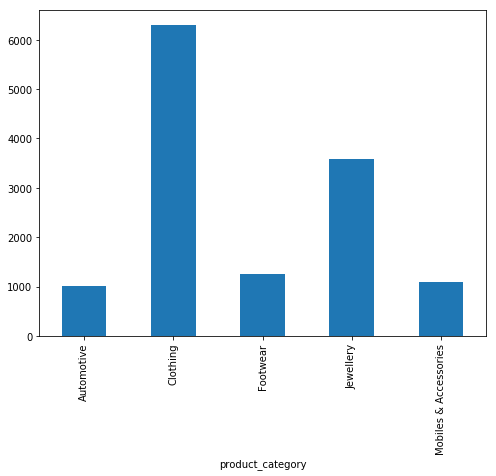

In [158]:
# Verify if any Imbalanced classes
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('product_category').description.count().plot.bar(ylim=0)
plt.show()

In [159]:
# Text Representation: TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.description).toarray()
labels = df.category_id
features.shape

(13254, 16515)

Each of the 13254 product descriptions is represented by 16515 features.

In [160]:
# Use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for description, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(description))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Automotive':
  . Most correlated unigrams:
. mat
. car
  . Most correlated bigrams:
. allure auto
. car mat
# 'Clothing':
  . Most correlated unigrams:
. shirt
. online
  . Most correlated bigrams:
. branded clothes
. clothes flipkart
# 'Footwear':
  . Most correlated unigrams:
. loafers
. boots
  . Most correlated bigrams:
. women wedges
. com buy
# 'Jewellery':
  . Most correlated unigrams:
. alloy
. necklace
  . Most correlated bigrams:
. necklace rs
. alloy necklace
# 'Mobiles & Accessories':
  . Most correlated unigrams:
. cover
. ipad
  . Most correlated bigrams:
. cover apple
. apple ipad


## Multi-Class Classifier
1. Transform the product descriptions into a vector of numbers. Below vector representations are as TF-IDF weighted vectors.
2. Train supervised classifiers to train unseen product “descriptions" and predict the “product_category” on which they fall.

In [176]:
# Naive Bayes Classifier: multinomial variant
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['product_category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [162]:
# Extract sample product description from test data
X_test[11456]

'JewelsWonder Wood Necklace - Buy JewelsWonder Wood Necklace only for Rs. 395 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!'

In [163]:
# Extract corresponding prediction label for the above
y_test[11456]

'Jewellery'

In [177]:
# Sample Prediction from the above sample record
print(clf.predict(count_vect.transform(['JewelsWonder Wood Necklace - Buy JewelsWonder Wood Necklace only for Rs. 395 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!'])))

['Jewellery']


In [165]:
df.loc[ [11456] , : ]

,product_category,description,category_id
11456,Jewellery,JewelsWonder Wood Necklace - Buy JewelsWonder ...,3


Experiment with different machine learning models

1. Logistic Regression
2. Naive Bayes (Multinomial)
3. Linear Support Vector Machine
4. Random Forest

In [166]:
# import warnings filter 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [167]:
# Evaluate accuracy and find the source of potential issues
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
# 5 - fold cross validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

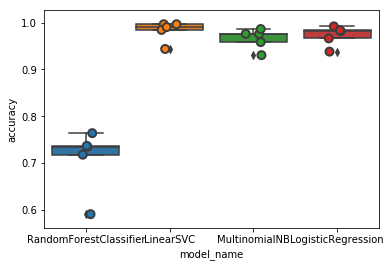

In [168]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [169]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.982423
LogisticRegression        0.972464
MultinomialNB             0.965525
RandomForestClassifier    0.708930
Name: accuracy, dtype: float64

LinearSVC, Logistic Regression and Multinomial Naive Bayes perform better than RandomForest classifier, with LinearSVC having a slight advantage with a median accuracy of around 98%.

In [170]:
# Model Evaluation: Support Vector Machines - LinearSVC() 
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

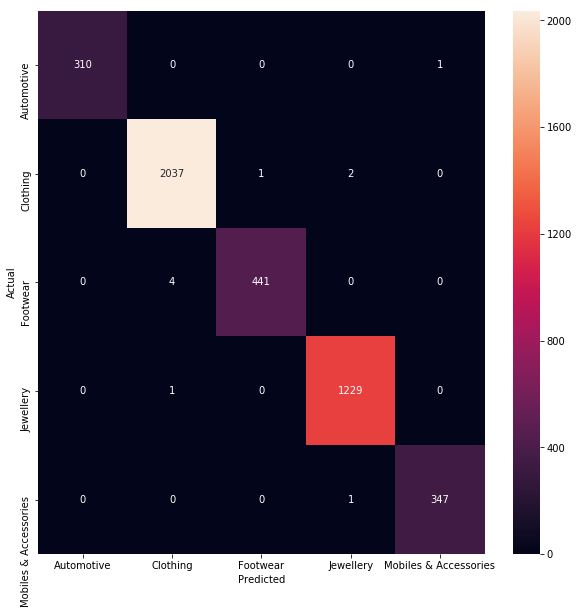

In [171]:
# Plot Confusion matrix to find the discrepancies between predicted and actual labels.
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.product_category.values, yticklabels=category_id_df.product_category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [172]:
conf_mat

array([[ 310,    0,    0,    0,    1],
       [   0, 2037,    1,    2,    0],
       [   0,    4,  441,    0,    0],
       [   0,    1,    0, 1229,    0],
       [   0,    0,    0,    1,  347]])

From the above confusion matrix, huge number of predictions are on the diaognal, where the predicted label is equal to actual label, however there are some misclassifications.

In [173]:
# Examine misclassifications
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] > 0:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['product_category', 'description']])
      print('')

'Footwear' predicted as 'Clothing' : 4 examples.


,product_category,description
7709,Footwear,Key Features of killys Men's Solid No Show Soc...
7654,Footwear,Key Features of Camey Men's Quarter Length Soc...
7352,Footwear,Yepme Slip On Shoes\n ...
7807,Footwear,Niremo Green Loafers\n ...



'Jewellery' predicted as 'Clothing' : 1 examples.


,product_category,description
8767,Jewellery,Key Features of Pout Brass Bangle Beautiful Ba...



'Clothing' predicted as 'Footwear' : 1 examples.


,product_category,description
4795,Clothing,Key Features of killys Men's Solid No Show Soc...



'Clothing' predicted as 'Jewellery' : 2 examples.


,product_category,description
6114,Clothing,Key Features of Pout Brass Bangle Beautiful Ba...
6038,Clothing,Key Features of classyworld Brass Cufflink Ide...



'Mobiles & Accessories' predicted as 'Jewellery' : 1 examples.


,product_category,description
12917,Mobiles & Accessories,Buy Dyna Silver Heart Stereo Wireless Bluetoot...



'Automotive' predicted as 'Mobiles & Accessories' : 1 examples.


,product_category,description
125,Automotive,Fly FLY Universal Can/Cup Holder for Car (Blac...


In [174]:
# Use chi-squared test to find the terms that are the most correlated with each of the categories
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Automotive':
  . Top unigrams:
       . car
       . vehicle
  . Top bigrams:
       . online genuine
       . steering cover
# 'Clothing':
  . Top unigrams:
       . bra
       . shirt
  . Top bigrams:
       . shirt price
       . dress price
# 'Footwear':
  . Top unigrams:
       . boots
       . shoes
  . Top bigrams:
       . com buy
       . women heels
# 'Jewellery':
  . Top unigrams:
       . necklace
       . bracelet
  . Top bigrams:
       . necklace price
       . necklace buy
# 'Mobiles & Accessories':
  . Top unigrams:
       . cover
       . ipad
  . Top bigrams:
       . tempered glass
       . flip cover


In [175]:
# Print out the classification report for each class
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['product_category'].unique()))

                       precision    recall  f1-score   support

           Automotive       1.00      1.00      1.00       311
             Clothing       1.00      1.00      1.00      2040
             Footwear       1.00      0.99      0.99       445
            Jewellery       1.00      1.00      1.00      1230
Mobiles & Accessories       1.00      1.00      1.00       348

            micro avg       1.00      1.00      1.00      4374
            macro avg       1.00      1.00      1.00      4374
         weighted avg       1.00      1.00      1.00      4374

